In [22]:
import numpy as np

In [23]:
def operacionFila(A,fil_m,fil_piv,factor):
    A[fil_m,:]=A[fil_m,:]-factor*A[fil_piv,:]

In [24]:
def escalonaSimple(A):
    nfil=A.shape[0]
    ncol=A.shape[1]

    for j in range(0,nfil):
        for i in range(j+1,nfil):
            factor=A[i,j]/A[j,j]
            operacionFila(A,i,j,factor)

In [25]:
A = np.array([[2,3,-1],
              [0,5,4],
              [0,0,6]])
b = np.array([-7,2,18])

#x = np.linalg.solve(A,b)
#print(x)

print(A)
print(b)

[[ 2  3 -1]
 [ 0  5  4]
 [ 0  0  6]]
[-7  2 18]


In [26]:
def sustRegresiva(A,b):     #Resuelve un sistema escalonado
    N=b.shape[0]   #A y b deben ser array numpy bidimensional
    x=np.zeros((N,1))
    for i in range(N-1,-1,-1):
        x[i,0]=(b[i,0]-np.dot(A[i,i+1:N],x[i+1:N,0]))/A[i,i]    
    return x #arra bidimensional


In [27]:
def sustProgresiva(A,b):   #Resuelve un sistema Triangular Inferior
    N=b.shape[0]   #A y b deben ser array numpy bidimensional
    x=np.zeros((N,1))
    for i in range(0,N):
        x[i,0]=(b[i,0]-np.dot(A[i,0:i],x[0:i,0]))/A[i,i]    
    return x #arra bidimensional

In [28]:
def Gausselimsimple(A,b):
    Ab=np.append(A,b,axis=1)
    escalonaSimple(Ab)
    A1=Ab[:,0:Ab.shape[1]-1].copy()
    b1=Ab[:,Ab.shape[1]-1].copy()
    b1=b1.reshape(b.shape[0],1)
    x=sustRegresiva(A1,b1)
    return x #array bidimensional

In [29]:
def intercambiFilas(A,fil_i,fil_j):
    A[[fil_i,fil_j],:]=A[[fil_j,fil_i],:]

In [30]:
def escalonaWithPiv(A):
    nfil=A.shape[0]
    ncol=A.shape[1]

    for j in range(0,nfil):
        imax=np.argmax(np.abs(A[j:nfil,j]))
        intercambiFilas(A,j+imax,j)
        for i in range(j+1,nfil):
            factor=A[i,j]/A[j,j]
            operacionFila(A,i,j,factor)

In [42]:
def GaussElimwithpiv(A,b):
    Ab=np.append(A,b,axis=1)
    escalonaWithPiv(Ab)
    A1=Ab[:,0:Ab.shape[1]-1].copy()
    b1=Ab[:,Ab.shape[1]-1].copy()
    b1=b1.reshape(b.shape[0],1)
    x=sustRegresiva(A1,b1)
    return x #array bidimensional

In [32]:
import numpy as np
#import libreria as lib
A=np.random.rand(4,4)
#print(A)
b=np.random.rand(4,1)
#print(b)
sol=Gausselimsimple(A,b)
print("Solution: ")
print(sol)
residuo=A@sol-b
print("\n Residuo:\n", residuo)


Solution: 
[[ 0.04740594]
 [ 1.471483  ]
 [-0.72177343]
 [-0.1556384 ]]

 Residuo:
 [[ 1.11022302e-16]
 [ 4.44089210e-16]
 [ 0.00000000e+00]
 [-3.33066907e-16]]


In [33]:
import numpy as np
import time
#import libreria as lib
n=13
A=np.random.rand(n,n)
#print(A)
b=np.random.rand(n,1)
#print(b)

start_time=time.perf_counter()
sol=Gausselimsimple(A,b)
end_time=time.perf_counter()
elapsed_time=end_time-start_time
print(f"Elapsed time: {elapsed_time:.4f} seconds")

print("Solution: ")
print(sol)
residuo=A@sol-b
print("\n Residuo:\n", residuo)

Elapsed time: 0.0011 seconds
Solution: 
[[ 41.54118187]
 [ -2.85330796]
 [ 13.60784705]
 [-17.22691763]
 [  5.03016514]
 [-29.74614427]
 [  3.20557049]
 [ -9.7404972 ]
 [-14.77117272]
 [ -0.10212832]
 [ 10.39680945]
 [ 16.9411991 ]
 [-17.77915768]]

 Residuo:
 [[ 2.49800181e-15]
 [ 2.77555756e-15]
 [ 1.97386552e-12]
 [-4.58522109e-14]
 [ 3.85691479e-13]
 [ 1.02029496e-12]
 [ 7.28916927e-13]
 [-7.61612995e-14]
 [ 5.73097125e-13]
 [ 1.21899019e-12]
 [-2.20690133e-12]
 [-6.05349104e-13]
 [ 8.24229573e-13]]


In [34]:
n=180
A=np.random.rand(n,n)
b=np.random.rand(n,1)

X=GaussElimwithpiv(A,b)
normErr1=np.linalg.norm(A@X-b,1)

X=Gausselimsimple(A,b)
normErr2=np.linalg.norm(A@X-b,1)

X=np.linalg.solve(A,b)
normErr3=np.linalg.norm(A@X-b,1)



In [35]:
def LUdecomposition(A):
    nrows=A.shape[0]
    
    U=A.copy()
    L=np.eye(nrows,nrows,dtype=np.float64)
    for col in range(0,nrows-1):
        for row in range(col+1,nrows):
            factor=U[row,col]/U[col,col]
            L[row,col]=factor
            operacionFila(U,row,col,factor)
    return L,U

            

In [36]:
n=4
A = np.random.rand(n,n)
LU=LUdecomposition(A)
L = LU[0]
U = LU[1]
print("L=", L)
print("U=\n", U)
print("nA:\n", A-L@U)

L= [[ 1.          0.          0.          0.        ]
 [ 0.50636587  1.          0.          0.        ]
 [ 2.8300077  -0.54244052  1.          0.        ]
 [ 2.00371852 -0.16359319  0.39676848  1.        ]]
U=
 [[ 0.33785472  0.36238828  0.88336677  0.20427107]
 [ 0.          0.66805714  0.31738743  0.85553114]
 [ 0.          0.         -2.18792031  0.69398897]
 [ 0.          0.          0.          0.43092747]]
nA:
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [37]:
def SolvByLU(A,b):
    LU = LUdecomposition(A)
    L = LU[0]
    U = LU[1]

    Y = sustProgresiva(L,b)
    X = sustRegresiva(U,Y)
    return X

In [38]:
n = 5
A = np.random.rand(n,n)
b = np.random.rand(n,1)

x = SolvByLU(A,b)

print("Ax=b:\n", np.linalg.norm(A@x-b,1))

Ax=b:
 8.532063944244328e-14


In [39]:
import numpy.polynomial as P
def interpLagrange(cx,cy):
    n=len(cx)
    p=P.Polynomial([0])
    for i in range(n):
        mascara=np.ones(n,dtype=bool)
        mascara[i]=False
        raices=cx[mascara]
        Laux=P.Polynomial.fromroots(raices)
        p=p+cy[i]*Laux/Laux(cx[i])
    return p

-148.0 + 164.5047619 x - 62.05 x**2 + 9.6047619 x**3 - 0.55 x**4 +
0.0047619 x**5
[  1.   3.  -4.  -5.  17. -19.]


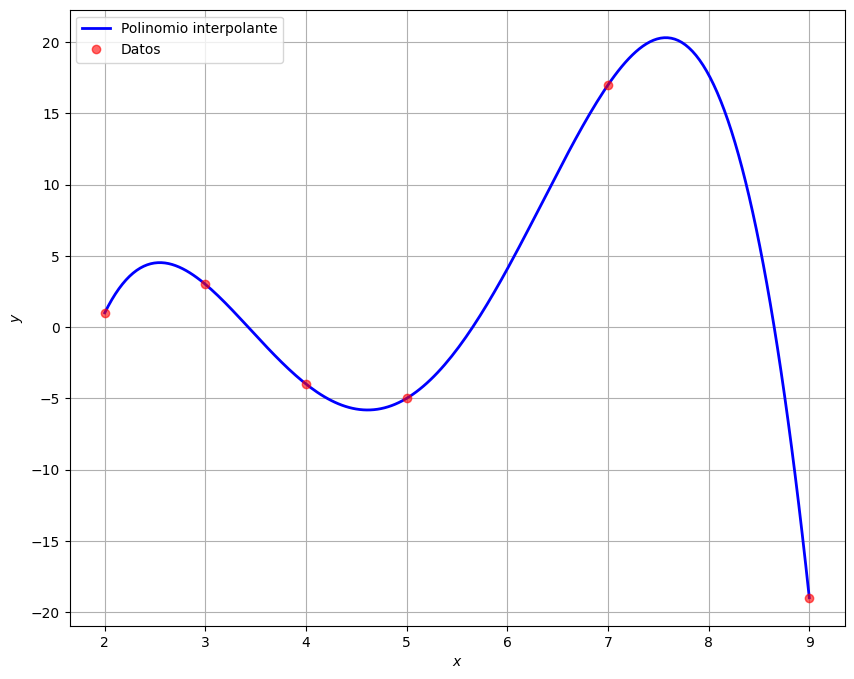

In [40]:
import matplotlib.pyplot as plt
'''Interpolación'''
x=np.array([2,3,4,5,7,9])
y=np.array([1,3,-4,-5,17,-19])
pol=interpLagrange(x,y)

print(pol)
print(pol(x))

"Gráfica"
a=x.min()
b=x.max()
xx=np.linspace(a,b,200)
yy=pol(xx)

fig, ax=plt.subplots(figsize=(10,8))
ax.plot(xx,yy,'b',lw=2,label='Polinomio interpolante')
ax.plot(x,y,'ro',alpha=0.6,label='Datos')
ax.legend(loc=2)
ax.set_xlabel(r"$x$",fontsize=10)
ax.set_ylabel(r"$y$",fontsize=10)
plt.grid()
plt.show()


In [41]:

print(p)
print(p.degree)
print(p.coef)
print(p.roots)
q=P.Polynomial([-1,1])  

NameError: name 'p' is not defined

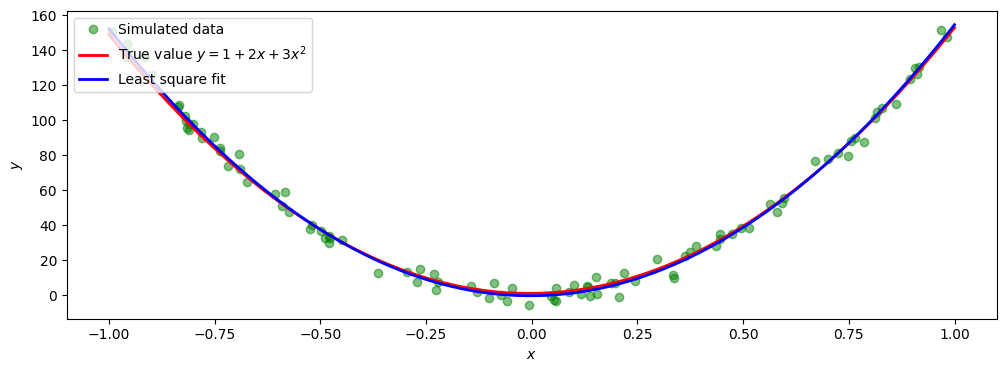

In [44]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

x=np.linspace(-1,1,100)
a,b,c=1,2,150
y_exact = a+b*x+c*x**2

m=100
X=1-2*np.random.rand(m)
Y=a+b*X+c*X**2+4*np.random.randn(m)

A=np.vstack([X**0,X**1,X**2])
sol, r,rank,sv=la.lstsq(A.T,Y)


At=np.array([X**0,X**1,X**2])
auxMat=np.matmul(At,At.T)
b = np.matmul(At, Y).reshape(-1, 1)
sol=GaussElimwithpiv(auxMat,b)


y_fit=sol[0]+sol[1]*x+sol[2]*x**2
fig, ax=plt.subplots(figsize=(12,4))
ax.plot(X,Y,'go',alpha=0.5, label='Simulated data')
ax.plot(x,y_exact,'r',lw=2,label='True value $y=1+2x+3x^2$')
ax.plot(x,y_fit,'b',lw=2,label='Least square fit')
ax.set_xlabel(r"$x$",fontsize=10)
ax.set_ylabel(r"$y$",fontsize=10)
ax.legend(loc=2)
plt.show()


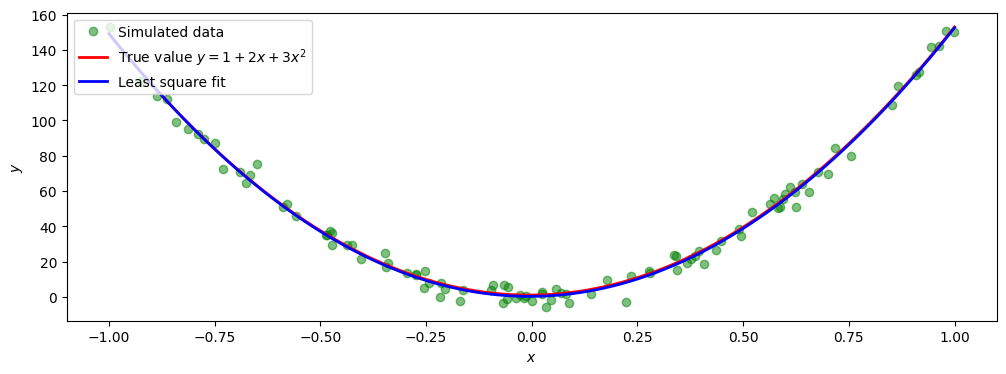

In [46]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

x=np.linspace(-1,1,100)
a,b,c=1,2,150
y_exact = a+b*x+c*x**2

m=100
X=1-2*np.random.rand(m)
Y=a+b*X+c*X**2+4*np.random.randn(m)

A=np.vstack([X**0,X**1,X**2])
sol, r,rank,sv=la.lstsq(A.T,Y)


At=np.array([X**0,X**1,X**2])
auxMat=np.matmul(At,At.T)
b = np.matmul(At, Y).reshape(-1, 1)
sol=GaussElimwithpiv(auxMat,b)


y_fit=sol[0]+sol[1]*x+sol[2]*x**2
fig, ax=plt.subplots(figsize=(12,4))
ax.plot(X,Y,'go',alpha=0.5, label='Simulated data')
ax.plot(x,y_exact,'r',lw=2,label='True value $y=1+2x+3x^2$')
ax.plot(x,y_fit,'b',lw=2,label='Least square fit')
ax.set_xlabel(r"$x$",fontsize=10)
ax.set_ylabel(r"$y$",fontsize=10)
ax.legend(loc=2)
plt.show()


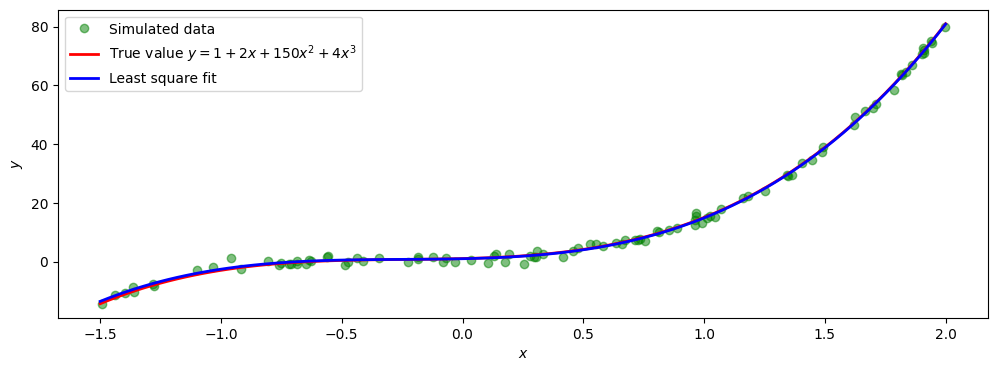

In [68]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
xa,xb=-1.5,2
R=1
x=np.linspace(xa,xb,100)
a,b,c,d=1,2,5,7
y_exact = a+b*x+c*x**2+d*x**3

m=100
X=xa+(xb-xa)*np.random.rand(m)
Y=a+b*X+c*X**2+d*X**3+R*np.random.randn(m)

A=np.vstack([X**0,X**1,X**2,X**3])
sol, r,rank,sv=la.lstsq(A.T,Y)


At=np.array([X**0,X**1,X**2,X**3])
auxMat=np.matmul(At,At.T)
b = np.matmul(At, Y).reshape(-1, 1)
sol=GaussElimwithpiv(auxMat,b)


y_fit=sol[0]+sol[1]*x+sol[2]*x**2+sol[3]*x**3
fig, ax=plt.subplots(figsize=(12,4))
ax.plot(X,Y,'go',alpha=0.5, label='Simulated data')
ax.plot(x,y_exact,'r',lw=2,label='True value $y=1+2x+150x^2+4x^3$')
ax.plot(x,y_fit,'b',lw=2,label='Least square fit')
ax.set_xlabel(r"$x$",fontsize=10)
ax.set_ylabel(r"$y$",fontsize=10)
ax.legend(loc=2)
plt.show()
